In [1]:
import pandas as pd
import numpy as np
import re
import timeit
import warnings
import string
import seaborn as sn
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
import emoji
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tkinter import ttk
from tkinter import *
import time

In [2]:
def preprocessing(text):
    print(text)
    #text = re.sub("[^a-zA-Z]", " ",text)
    #text = re.sub("[0-9]", " ",text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = text.lower()
    text = (re.sub(' +',' ',text)).strip()
    text = emoji.get_emoji_regexp().sub("", text)
    return text

In [3]:
def evaluation_metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred) # Accuracy of prediction
    conf_mat = confusion_matrix(y_test, y_pred) # Confusion matrix
    precision = precision_score(y_test, y_pred, average='macro') # Precision
    recall = recall_score(y_test, y_pred, average='macro') # Recall
    f1 = f1_score(y_test, y_pred, average='macro') # F1-score
    evaluation = [accuracy, conf_mat, precision, recall, f1]
    return evaluation

In [4]:
def rks(data,dim=4,random_state=27):
    m,n = np.shape(data)
    np.random.seed(random_state)
    rand_mat = np.random.normal(size=(n,n*dim));
    print(np.shape(data),np.shape(rand_mat))
    trans_data = np.matmul(data,rand_mat);
    cos_data = np.cos(trans_data)
    sin_data = np.sin(trans_data)
    concat_data = np.concatenate((cos_data,sin_data),axis=1)
    return concat_data

In [5]:
df_train_orig = pd.read_csv("./data/ta-en-misogyny-train.csv",sep="\t",names=["class","comments"])
df_dev_orig = pd.read_csv("./data/ta-en-misogyny-dev.csv",sep="\t",names=["class","comments"])

In [6]:
df_train_orig.head()

,class,comments
0,None-of-the-above,enaku unmaikum aluha wantu thirunangaigal thei...
1,Transphobic,SUPERSTAR VIJAY dai arivuketta polu ithu thapp...
2,None-of-the-above,Ugka smile cute a iruku😊😊...
3,None-of-the-above,Anna i am waiting na 🥰🥰🥰
4,None-of-the-above,Yanda tamilnadu la evvalavo pirachana iruku at...


In [7]:
df_train_orig[df_train_orig["comments"].isna()]

,class,comments
27,None-of-the-above,NaN
730,None-of-the-above,NaN
3829,None-of-the-above,NaN
5027,None-of-the-above,NaN
5874,None-of-the-above,NaN


In [8]:
df_dev_orig.head()

,class,comments
0,None-of-the-above,Black saree u r so hot
1,Counter-speech,Halo first ayunga kai thatti amount keatkyrang...
2,None-of-the-above,Hello...... manithana sollunga.......... prama...
3,Xenophobia,China kaaranai nalla kalaipan daily I am enjoy...
4,None-of-the-above,Onnota ponnu ipdi Panna vituviya


In [9]:
df_dev_orig[df_dev_orig["comments"].isna()]

,class,comments
692,None-of-the-above,NaN
811,None-of-the-above,NaN


In [10]:
df_train = df_train_orig.fillna("unknown")
df_dev = df_dev_orig.fillna("unknown")

In [11]:
print(df_train.isna().sum(),"\n")
print(df_dev.isna().sum())

class       0
comments    0
dtype: int64 

class       0
comments    0
dtype: int64


In [12]:
n_classes = len(np.unique(df_train["class"]))

In [13]:
le = LabelEncoder()

In [14]:
X_train = [(preprocessing(i)) for i in df_train["comments"]]
X_val = [(preprocessing(i)) for i in df_dev["comments"]]

Y_train = le.fit_transform(np.array(df_train_orig["class"]))
Y_val = le.transform(np.array(df_dev_orig["class"]))

enaku unmaikum aluha wantu thirunangaigal theiwangal 😢😢😢
SUPERSTAR VIJAY dai arivuketta polu ithu thappu pavam Da Amanda na gay relationship virukkuren  ethirkkiren
Ugka smile cute a iruku😊😊...
Anna i am waiting na 🥰🥰🥰
Yanda tamilnadu la evvalavo pirachana iruku athalam vittudu ethu oru pirachana vanthu kettu iruka
Night fulla mater ku alaiuradhu day fulla pichaiku alaiuradhu idhula louds paaru potta p___a...
l v  innum konja varshathula yaaru agadhi aah sutha poradhunu therium thozhar..😂
Bala kumar  wat ur asking.? 1st  olunga kealviya kealunga.
Unaku aids vandhuruchi pola olunga iru...
pradeep  kodi per iruka maataanga nu nenaikireengala? Ellaarum Ungala maadri aaluku bayandhutu open aa solla maatraanga. India la 130 crore la 30 crore LGBT thaan.. Aana adha open aa ellaarkitayum solradhu enna maadri konjam per thaan..
yena public la pesa pudikalaya..dei arivu ellathavane!! athunaala thana epdi comments ta pesitu ne eruka..epo veliya vaaya thorantha yellarum unnaiya serupala adipanga.

14:00  serupala adicha maari sonninga❤️
Balakrishnan k  ange ukkanthu irukkura ammbalaingalukkuthaan..bro
Etchai raja vairamuthu mairu kuda unnalla pudanga mudiyathu
Veedu aen kkraanga means once hubby veeta vittu poga sonna Ava avoloda veetla irukalaam so
naan sri lanka la irukkan
Muthu Manuel  neenga valaravae mateengapa:(
Loose paya...parpan h raja.....soru thinura raja...
Wow....cute.... Indha Madhuri wife kedaika niga kuduthu vechurukanum
Rajeswari Rajeswari   na four daysa feel panren pa I am sad 😔😔😔
Baby time iruntha yenda or u  naal stay panuvingala
DMKJambu Lingaa   OK manaviyai mathippom. Malai pola valgaiyil uyarvom. 🙏🙏🙏🙏
Magi Priya  it's okay maa no problem
siraj raja  pon namer sent me
bro itha thappu nu solra avanga athukku yen sollution ha sollala
Pandiyan P  ok bro but neenga gay va bro ❤️
H RAJA VAZGHA...BJP VAZGHA....VANDE MATARAM....JAI HIND...TAMIL VAZGHA....
I support h raja sir
echa poriki thevidyaa paya raja
China va aliens nu solli thalli vainga... usura vaangur

Seruppu raja nanga ella mathathavarum otturumaiyathan ullom nee mooodu
natula evvalavu pirachanai irukku athellam focus pannama ithapoi thevaiya.om namachivaya.
Raja mohamed  neenga madha saarba peysureenga nan adha madhikiren... Unagaluku oru aanum aanum seruradhu epdi aruvarupa iruko adhey maadri avangaluku oru penn kooda serndha aruvarupa irukum... So avangala avanga pookuku vitralam... Kadavul ovoruthara padaikumbodhum oru kaaranama padachirukan... Avanga moolama inaperukam veynamnu kooda nenachurukalam... Avanga seiradhu ellamey sarinu nan sollala... But adhu mulumaya thappu illa nu solren... And one more thing homosexuals percentage romba kammi so inaperukathuku endha baadhipum varadhu
Its fully debate. No use for solution... Neenga mattum yokiama pasanga pasanga apdi venum ippadi venumnu kekrathu ila. Athu mari thaan dowryum. Dowry kekurathu thapu ila. Edhu maari yana dowry nu mukiyam
Idha pathu valara pora namma pasanga nelamaiya nenacha dhan bayama irukku.idha ippovae mudichid

Thirppu sonna Charja Seruppala adikkanum
madhavaraj madhavaraj  come WhatsApp bro
Hotstar la season 23 Episode166 paaruga sister🙂
gotha h.raja madha verri puducha punda
Vairamuthku va kulpu unku koothi kulpu
pochula la olu vangarathuku nee ivlo neyam pasara?
Inda nayukula firstu world map lerunda alichurnum...🙄🙄
Pokemon shinchan solrappa back le anda baby avanga ppa kitte solra appa anda auntyum shinchan pakkraru pa nu😂
Girl LA vida alaga irukaga
kolanthai eduthu valakkumpothu antha kulantha valarumpothu ethanai avamabangala pakumunu theriuma muttal
Sir...Ungaluku  freedom iruku ndrathaala thaan pollachi la pala penn ipadi aananga.  Athuku vekka padaama ipadi oru statement...U people r same as the Rapist...; Just Molesting and Abusing the Rights and feelings of  LGBT people...; Ungala solli yenna ...Ellam Vithi
Vijay 001  va pa sikkerama
Yevlo alaga theliva pesuringa. Yevlo thiramaiyana ponnu....
Enga parunga friest government........ku solunga.........apram evankakita soluvinga
Aaanda

Time irunta linenukku vanga.OK va machi.
Varadhatchanai pen ketka koodadhu enum maanbumigu aangale thaangal evalavu vangineergal. 🤔🤔🤔
Mm iruka raj;          Gopa;           Erode la
Avanga natta blank pannuga aavanunga oora vittu veliya varama adachu veiunga
Vaanga sir adhula pm stalin president kanimozhi ok va ?
chandra lekha  podi fake id
Storm Breaker  ohhh ninga thaan... Goundanaa... Punda thaan irukumaame koothi magane
Ramaanku venum Chandran   ungalukku yanna pidikkum
Jadhi pathi yen pesa koodadhu... Apdina neenga yen india pakisthan americanu pirichu pesureenga... Indianu solla perumai padrenu solreenga... Naatupatru perumai adhey maadri dhan jadhi patrum... Ellarukum irukanum...
Sathiya nenga vera leval panringa and subscribe done for 😀
Vera level bro neenga.......nalla panringa....neenga ithu Pola eppome Nalla vanthuttute irukkanum bro....
Dai ennada show   kopinath narapayalay
Mani Kandan  Paisa elanu sonna vetta paravalaya vetamatagalea athan problem bro
Basic Tamizhan.. Nee

She is very cute...Kalla kabadam illa manasu
100 rupees kudutrupanga...andha thirunangai ku ..ok. ..adha. ..ipdi ...Mmm
Dai ethu alam oru show
Yedukurathu pitcha ithula thimuru vera ivanguluku
Anna sikram waiting for part 2
Already athu ella oorulayum nadakuthu maybe athu sattam aanalum agum karumom
Ivanga ethula act panni irukanga
Ansar Ansar  ungalukku eththina arivu?
மாளவிகா தமிழ்  athe thaan correct 😞😞😞
Jilla Muthu Ur watsapp number kudu dear
rocky bhai  unga name bro
Nee yella oru ponna di ippadi pesura ungalukku antha mari kolantha porakkanu appo theriyum athoda vali yenda unakku oru ponnu mela love yaaraavathu solliya varuthu athu unnoda feeling tha da athu mari thanda ithuvum athu thappunu nee sonna Gay ahvo lesbian ah vo poranthathu avanga thappu illa daa padacha antha kadavuloda thappu thannoda aasaya veliya solla mudiyama pidichatha seiya mudiyama irukkurathu naraga vethanai da neenga yaaru eathukka vena aana ippadi yella pesi kaaya paduthathinga avangaluku pudichamari eppot

Ulaga naadukal onru enaiya ventum evanunkala alikanum
Ananda sir you are good
harihara shankar  bro ennoda number send pannirukenu sonnen
Iruka kadupula elan country yun china mela attack pana nu fst india va irukanu😂😂
Oraitha ellarum sernthu bomb potu midichu vitrungada
Nama pakre view la tha irukku... Ellame.. pudichavanga pudichuvangaloda serumpothu vedika pakre namaken noganum..
Raman Laksh  u age Machi
yenaku hindikaran sunni umbi tamilana patha dhan kovam varudhu..yenda thani naadu kekama inum delhi gujarati marwadi sunniya umbitu irukanunga nu..🤮
Storm Breaker  unna maathiri alu tn la iruka modhu naa irukarudhula thapu illa
Ameer Dheen   over bro
Vera level act mass performance 😂😁
Ivanga naducha lesbian movie name sollunga guys please
I am venkatesh  gotha pundaila 5 vaigaai poolu pogumamaedaa apdiya
திருமறைக்காடு சோழகுலத்தான்  thappu Ellam nam seivathu. Piragu pengale paththi kurai solluvathu. Enna ulagamuda sami. Pengale mathippom. Vallvil valam peruvom..
Jathi pakuravanga. Un

sathiyama echa raja unga aatha thanda thevidiya nee palaperuku porandhavanda.
Daiiii nalla ootura da en guru va
Mohammed Arshad  bro ore santhosama mum kuthukalama irukku dp photo 😂😅😅😁😆😄
Bro nejamawe antha akka singapen than bro.❤❤❤❤👍
Hi ram sorry nanum appo appo ruthra pathil kedduruppen inimel kekka Madden kandippa neega ninaithathu nadakka vaalthukkal
madhavaraj madhavaraj  enna panra Machi
I have Stopped seeing vj tv .
En da epdi panringa...negalam nasama poiduviga da
Daily bus la ethuka imsai thaagamutilaaa
Po daa loosu koodhi para chakkili thayvidiyaa payalay! Un ombodhu pundaiyai mooditu po di! Illainaa unnaiyum uzhzha thalli nungeduththuruvoam!
Anbu S Anbu  apadi sollakoodathu ma irukura naal evlo naal nu theriyathu but irukumvarai happya irupom
I support USA 🇺🇸 🇺🇸
China paiyala una aliga yarum eila kadavola nee vanthu China aliga mattiya
CS CS  high class la panathukkum panathukkumdhan kalyanam nadakkum
thala sathish  bro what's app la massage panuga
Gay na girl body change ag

Malini super speech pls Malini uaga partner yaru we want see him bcos neaga paka so blodness
Guru murthi  komma pundaya veeritchi vatchi ookka
R Ramya  hi ramya...r u lesbian
Gay love la yethu true
Ithan namakum avagalukum irukkura vithiyasam avagaluku irukkura manasu kuda namaku irukkathu antha anna kettaganu road la eh yaru irukkaganu kuda pakkama dance pandraga❤️... respect transgender ❤️😭
Sir appadiya Namma Super star kooda tax katama school nadathuraru. Komchum adhayum kanukulavn; .
I like Sangu vai 😆
Win pannanum nu avasiyam illa; ; Neenga happy ah irukardhu dha mukkiyam; ; Yaarukum nirubika venam; ; Just be happy 😊😊😊
Nee ga lum ya amma tha
unnala Da yalla trunagaiku ketta paru
madhavaraj madhavaraj  un number last 3 number sollu
raja priya  ivanunga dha manusanayae mathika theriyadhavanunga aprm enga irundhu puriyu
NAMBIGANAPATHY MUTHUSAMY  na nala sappuven yaru vara
Bro neenga Vera Laval 😘😍
Vinoth Karuppan  uga nunber send me
P. Nagaraj _ 43  koodakovil
Intha marri  psycho kkal

Rafeeq Samreen Rafeeq Samreen  dey mohamad ella pombalaigalaiyim othukunu alanjaaan....arabia religionuku sombu thookuriyaa
siva selvaraj  enakku venum bro
Neet exam ku niya nana episode create panuinga pariyalavil poogum
தணிகைவேல்  oh apdiya...neeinga yaaru boos...????
Super da vera level keep rocking da ak clm
innocent Raj  enna profile vachiruka nee instagram illa sollu
Dai..naduvara unna partha than da...over ha kovam varuthu...Badu
Mic neenga video podunga pls ; Na unga Story keadda piraguthan kai adippen✊💦💦 night mattum than keppa pannuva ; Unga Story suuuuuuper... 💚💛❤
Samsung K  enga veetla yarum ippadi public mandaiya udaikkala k
KINGISALWAYS KING   ella vidhigalukum vidhivilaku undu
3 k thana chill pannu mapi
ivan mugam parapathurku nall thevidiyaluku pirindhavan madhiriyeh iruku
Pundai mavani raja onukiu vatila ponu erntha anubau
Dhaasikku.  pirandhavane matravarai part hu íppadi Silvan
Aama boss ava Oru thiviravadhi. Isis leader
Unna seruppala adichi tamilnada vittu thoratha

Ponnunave ungaluku veetukula unga pecha ketukitu irunthatha nalarukum enaikum samugam mela vara nengala vidavematinga...
😭😭 super akka 😭😭 support puninka frnds thirunankiyika elorikuma support puninka 🙏🙏🙏
Mani kanta r Mani aavigal is America Solanki sir  Hi
yy sex sa  important da yallarum eppa konduvaringa marriage appa amma evangalam errukaga OK vaa summa sex sex nu peasathinga pls children use pannuranga peasavendiya problem peasura not important this topic
dei yenna maithukku da porandha vudanae yenna jadhi nu kettu govt la register panra........
Saththiyama alundhutan bro onekage adunage paru angke nikkiragaya respect 🙏❤️❤️❤️❤️❤️thale vere level  nanba
adra sakka... ur my sissy...
Un friend muslimna avan v2tu ponna ketta katti kuduppana
ungal valvil enrum magilchi pongatum🙏🙏🙏🙏🙏🙏🙏
Dai h raja dai nee theavadika piradavan than nee.dai poram poku .mohd pathi sayee irutha..un thai irukathu....tamilnadil pilaika vantha waysee mavanea...
H.raja nee nalla kudupathula parathavana first sol

Kadam vaanga manavithevallai aanal kadan thirupi kodukka manavi thevappadum.
Naama yedho venumnae avangala  kalaaikara madhiri aaidum part 1 mattum podhum
Good job super 👏 👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏
Gay life a kevalapaduthramari prank pandreengale but avanga feelings a unglala understand pannamudiyuthu pls don't understand
Karthik Durai  hi naanum Chennai
ravi chandran  kommala ookka dhevudiya makane
Kuttyma Jaya ..... hehehehe ....
Royal enfield Riders  Cheri & Agraharam onnaachunna yaarum salugaiyum ida odhukkeedum kekka maattanga. (idha naa sollala)
Ivalukala ulla thookki pottu ladankattanum.... Thirunangai na nallavanganutha kelvi patrukke ipdi oru ampalaya bus stand la vachu asingapaduthuranga
Hloo hetrosexual ku homosexual evlovo parvala
En di thevidea Munda nee epadinalum valnthuko di pund.....athu un istam un urimai di en di nall eyarkaiya valravangala en di thappa pesara di pund.....kilichida poren di engala pathi thapa pesana naanum unna pesathan seiyven athu en urimai
Bro next ve

Enga da aala kanom pathen
Plzz plzz plzz g ielts xamnaa enna eppdi 6.o to 7.5 bands edukurathuu; Eppd foreign nadukku study r worku porathuu; Maina poedunga g
Chinna la irundhu yaraum indiala sekadhinga coronovirus ae half population thukiduchu vena vitringa mudila
modi ku moodu sunni erurunthalum ore nerathil ombuva da naye nee Muslim sunniya verumbi umbuva ellorukkum therium
H.raja......un vamsam thaan thaaaassi. Vamsam neeee thaaan vandheri naadodi thiruttu paarpanan
prashanth sha  adhai ningal dhan kuravendu
Eppadi iruntha bharathi kanavu ennavakum community name solli naattai kedukiravangala indiava vitte thurathanum
Ivanukku Onnum teriyatu   ok
nee  yaru  pa
Dai pesama erunga da... Already kelapi vitatheh..  alai alaiyaa...poitu eruku. Ithula variety variety aa diseases ...
Seeman porampoku unoda ammavum ????
Apdina malini yum avanga amma vum sex vechu kaalam  malini avanga appa kooda yum malini sex vechukalam appram moonu per sendhum group sex vechukkalam enna karuma di ithu ith

Vijay Kumar  love u too😘
Yaan da chinaa kaaran etha ethaiyo kandu pudikuraan neenga Enna da ellatha Oru jathi ya pasi vivatham pandrenga India urupadum da ...jathi eruku da ellarum manitha jathi avlo thaan
yaarukku soodi koduthaangalaam ... soodi kodutha nyayam kooti kodutha thappu ... enna vithyasam rendukum ...
Vipachari aandalai katuvulaka vanagum parpana devidiya magane odungada vada india
Illatha oru Matham Atha  Vera iliva  pesarangala MA  De hindu  Matha  naaye  hindu  mozhi  LA  pesuda  ; Tamil  mozhi  Hindu  Matham Illada  echa Raja
Gh Wb  aariya virunthalikku porantha thevidiya payale vada...neethanda ennaikku time pass...potta thevidiya payale
Pavithra Palani  my name's Nisha nanum en sinnama ponnum uyirukku uyira palagitu irukkom Ava illama na illa na illama Ava illa unga comments ellathaiyum parthen unga kita pesanum ethula pesalam sollunga sister
China yen innum vittu vaikuraanga nu therla..matra ulaga naadukal yen innum porumaiya irukaanga..ivlo Peru death anathuku China

Na nagama kainire vatutan da
Thiru Murugan  nee yaru mothella
Podi punda. over scene podura punda
Mhmd Mujahidh  pon namer sent me
Definitely varadhatchana innum adhigama dhan kekranga
En husband intha speecha ketka kooda thayaraa illa...
Unna solli thappu ilama ipdi oru padaipa ulagathuku kodutharu pathiya avara solanum...pls god innum evlo kevalam intha ulagathla nadakanum plsssss destroy this world
trajan chellam  WhatsApp number kudu bro
Unmaiyave Vera level Anna. Avangadha unmaiyana manidhabimanatthoda valravanga.🤝🤝🤝👌
Riya pls one time avangala meet pana asaya irruku pls help me.oru selfie
Ponnuga pesunaa intha maathiri pesuvaanga appa amma va kashta paduthura maathiri
RishiPedia  ☑  gootha whats your problem   mmmm unaku pidikala na muditu pooo that kind of person  na thapa pesuraa muditu po
Gopi un mela eruntha mariyatha suthama pochi.....
Rompa logical a pesuringal ; I respect you
Ulagathin iruthiyil pengal mattume irupargal
Dai Palaniyappa enna da serupala addicha pola eruku h

Transgender ellarum namaku amma akka  than bro. Nama transgender oru human ninachi yethukita pothum
harihara shankar  ithula thappu enna iruku bro thappa ninaichuruntha na unga koda chat panniruka matten bro unga number send pannunga bro pls
Ne 1st straight ah naye....neeyum orunal innoru paiyan pinnadi pova
Naalu kaasu varardhu na yedhuvum thappilla nu ninaikyaraan pola dei yippadi patta nee neeyum yevan kittayaavudhu paduthu kaasu vaanguva kooda porandhavaalayum kaasukku vilai pesuva kaasu dhen mukkiyam likes dhen mukkiyam na mannenna oothi koluthikittu video podendaa yeanda sillarathanama yosikyara
Aaanmai ulla raja vaera yevanukkum dil illa porukki pundai simen thevidiyapaya
MURUGANANTHAM .G nanum ungala madhiri dha nenacha bro but they are fake trans unmayana trans Vera level
Sridhar Sukumar  Plz check ur mail sridhar
Unna solli thappu illa.. Idha encourage panni law amend panna government eh sollanum.
Great video so sweet of u akka
Jaadhi jaadhi nu irukuravangaluku laa oru accide

Babu Natarajan  I'm 19 years old .tamilnadu
😈😈😈😈 papa nee vala thakuthi illavathava
Na ungalukkuu subcribe panni erukkaa yethukkaganaa negaa kadaisiyaa yellarukkuu help pannigalaa athukkagaa ❤❤❤💪💪👍👍👏👏
I am kerala big fan tmp
full dvd useleds pasangala irukanga  thuuu waste
Apadi sollunga bro... Sila jenmangaluku puriyala adhu
Kalli kalam ivungula mari aaluga naala tamil culture eh spoil aaga poguthu
Dhanush Basu  ok shut up
Yaru na kekaranga wife pecha keta avamanam nu nenaikaranga yethana per sonnalum keka mattanga
🤬🤬🤬🤬🤬🤬🤬 chinna naaaya unnallathan entha korona enge naadde santhilla nekethu
எங்கும் தமிழ்  Aariyamum dravidamum ondraai kalandhu pala yugamaagiradhu! Unga kattukadhaiyaiyum pidhatralaiyum dk dmk pdk tpdk mdmk vck ntk poandra vaysi veenar kootaththil sendru pidhatravum. Tamilukkum Tamilarukkum ariya thondu seidhavar Andhanargal. Tamil Thaatha U.V.Swaminatha Iyer tamilukku seidha thondu yeraalam.. Ungalai poandra kurugiya manam padaiththa poramai manam padaiththavarku arariy

padichavanga padikadhavanga athellam vidunga sollura karuththunu onnu erukku athu thappuna atha ethirika than seivanga  andha ponnu helihopter kettuchu appidinu solringa padicha ponnj appidi eppidinu oru padicha ponnu eppidiya pesum helihopterla vandha than marriage pannuvenu oru padippuna Enna reality purinchikitta mattume Ava padichava mature anava okva
Raj 456  u age Machi
Adinga... Oru naadu motha nadugalaium aati vaikuthu
Yarukutha kovam varala life ey pochu
I am venkatesh  gomma suthula pee vara varaikum okkuren
Love from Kerala . Tamil medium pasanga Super
dei na oru pombala da..unna maathiri ambala udambula erunthu epdi Mattama saga manithan pathi pesa mudiyaathu
Ungala nerla meet Panna mudiyuma
Chutti payyan sam  hmm ok da
Unnaiyellam vaauilavum vettama......ennum vittu vatchirukkainga paaaru.......yeatch kuoooja
2nd innings a..90 0ver ila pa..
Nambalayana  sivagangai la    okapatti ingra villagela ketu parungaa
nee oru nadar devarku support panni pesathey andal tamil nule elu

(array([ 95.,  43.,  53., 218.,  50., 919.,  40.,  70.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <a list of 8 Patch objects>)

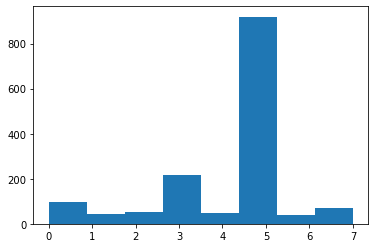

In [15]:
plt.hist(Y_val,bins=n_classes)

In [16]:
le.classes_

array(['Counter-speech', 'Homophobia', 'Hope-Speech', 'Misandry',
       'Misogyny', 'None-of-the-above', 'Transphobic', 'Xenophobia'],
      dtype=object)

In [17]:
df = pd.DataFrame(X_train)

In [18]:
df["class"] = le.transform(df_train["class"])
df.head()

,0,class
0,enaku unmaikum aluha wantu thirunangaigal thei...,5
1,superstar vijay dai arivuketta polu ithu thapp...,6
2,ugka smile cute a iruku...,5
3,anna i am waiting na,5
4,yanda tamilnadu la evvalavo pirachana iruku at...,5


In [19]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,5),analyzer="char_wb",max_features=2000)
tfidf_vec.fit(X_train,Y_train)

TfidfVectorizer(analyzer='char_wb', max_features=2000, ngram_range=(1, 5))

In [20]:
tfidf_vec_char = TfidfVectorizer(ngram_range=(1,5),analyzer="char",max_features=2000)
tfidf_vec_char.fit(X_train,Y_train)

TfidfVectorizer(analyzer='char', max_features=2000, ngram_range=(1, 5))

In [21]:
tfidf_vec_word = TfidfVectorizer(ngram_range=(1,5),analyzer="word",max_features=2000)
tfidf_vec_word.fit(X_train,Y_train)

TfidfVectorizer(max_features=2000, ngram_range=(1, 5))

In [22]:
X_train_charwb =(tfidf_vec.transform(X_train)).toarray() 
X_test_charwb = (tfidf_vec.transform(X_val)).toarray()

In [23]:
X_train_char =(tfidf_vec_char.transform(X_train)).toarray() 
X_test_char = (tfidf_vec_char.transform(X_val)).toarray()

In [24]:
X_train_word =(tfidf_vec_word.transform(X_train)).toarray() 
X_test_word = (tfidf_vec_word.transform(X_val)).toarray()

In [25]:
X_train_new,X_test_new = np.concatenate((X_train_charwb,X_train_char,X_train_word),axis=1),np.concatenate((X_test_charwb,X_test_char,X_test_word),axis=1)

In [26]:
X_train_rks =rks(X_train_charwb,dim=10,random_state=50) 
X_test_rks = rks(X_test_charwb,dim=10,random_state=50)

(5948, 2000) (2000, 20000)
(1488, 2000) (2000, 20000)


In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=1)
X_sm1_rks, Y_sm1_rks = smote.fit_resample(X_train_rks,Y_train)

In [28]:
#model 1
svcm = SVC(kernel="poly",C=100)
svcm.fit(X_train_charwb,Y_train)
p = svcm.predict(X_test_charwb)
print(classification_report(Y_val,p))

              precision    recall  f1-score   support

           0       0.51      0.37      0.43        95
           1       0.73      0.19      0.30        43
           2       0.67      0.15      0.25        53
           3       0.71      0.63      0.67       218
           4       0.75      0.18      0.29        50
           5       0.78      0.95      0.86       919
           6       0.47      0.17      0.25        40
           7       0.87      0.59      0.70        70

    accuracy                           0.75      1488
   macro avg       0.68      0.40      0.47      1488
weighted avg       0.74      0.75      0.72      1488



In [29]:
#model 2
smote1 = SMOTE(k_neighbors=1)
X_sm11_rks, Y_sm11_rks = smote1.fit_resample(X_train_charwb,Y_train)
st = time.time()
svm_clf_charwb1 = SVC(kernel="poly",C=100)
svm_clf_charwb1.fit(X_sm11_rks,Y_sm11_rks)
print("Time Taken To Train: ",time.time()-st) 
preds = svm_clf_charwb1.predict(X_test_charwb)
print(classification_report(Y_val,preds))

Time Taken To Train:  731.9632287025452
              precision    recall  f1-score   support

           0       0.51      0.43      0.47        95
           1       0.71      0.28      0.40        43
           2       0.59      0.25      0.35        53
           3       0.66      0.63      0.65       218
           4       0.58      0.22      0.32        50
           5       0.80      0.93      0.86       919
           6       0.47      0.23      0.31        40
           7       0.81      0.63      0.71        70

    accuracy                           0.76      1488
   macro avg       0.64      0.45      0.51      1488
weighted avg       0.74      0.76      0.73      1488



In [30]:
#model 3
svcmr = SVC(kernel="poly",C=100)
svcmr.fit(X_train_rks,Y_train)
p = svcmr.predict(X_test_rks)
print(classification_report(Y_val,p))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45        95
           1       0.82      0.21      0.33        43
           2       0.62      0.15      0.24        53
           3       0.72      0.65      0.68       218
           4       0.75      0.18      0.29        50
           5       0.78      0.95      0.86       919
           6       0.50      0.17      0.26        40
           7       0.90      0.61      0.73        70

    accuracy                           0.76      1488
   macro avg       0.70      0.42      0.48      1488
weighted avg       0.75      0.76      0.73      1488



In [31]:
"""
USED THIS
"""
#model 4
st = time.time()
svm_clf_charwb_smote = SVC(kernel="poly",C=100)
svm_clf_charwb_smote.fit(X_sm1_rks,Y_sm1_rks)
print("Time Taken To Train: ",time.time()-st)
preds = svm_clf_charwb_smote.predict(X_test_rks)
print(classification_report(Y_val,preds))

Time Taken To Train:  9983.98924279213
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        95
           1       0.71      0.28      0.40        43
           2       0.65      0.28      0.39        53
           3       0.68      0.65      0.66       218
           4       0.71      0.24      0.36        50
           5       0.80      0.93      0.86       919
           6       0.44      0.20      0.28        40
           7       0.85      0.66      0.74        70

    accuracy                           0.76      1488
   macro avg       0.67      0.46      0.52      1488
weighted avg       0.74      0.76      0.74      1488



In [32]:
df_Test = pd.read_csv("./data/ta-en-misogyny-test.csv",sep="\t",names=["class"])
X_fi = tfidf_vec.transform([(preprocessing(i)) for i in df_Test["class"]]).toarray()
X_fi_rks = rks(X_fi,dim=10,random_state=50)
preds_test =  svm_clf_charwb_smote.predict(X_fi_rks)
test_labels = le.inverse_transform(preds_test)
df_Test.to_csv("./result/CEN-Tamil_tamil-english.tsv",sep="\t",index=False)

ante peddi yedukkure ponnai vacci panam sambatikkuraange
Yella idangalilum pengalai asinga paduthuvathey hiv velaya irukku
Pannikku porandha paradhesi H Raja... Ponna pundaiyaandi
Ayya white T-shirt! Tamil culture pathi mulusa padichitu pesunga ji!
Madu vandhi  bjb fraudulent lady
புரட்சியாளன் சுபா  deiii sarakku midukku nnu pesnadhu naangala ila neenglada potta baadu...
Siva Kumar A  u r nos send pana bro
H.raja punda nakkula Yar irukka
Dravida kazigham periyar  story
Ivangale paathaa mathippaa irukk naan paarthathilaye romba azhagaana person manass ivanga thaa nnu manasaara solgiren
El TIGER  unaku epdi oru ponu mela attraction eruko andha Mari avangaluku same sex mela attraction eruku edha purinja theriyala na sagu
Ramesh Selvaraj  neega entha ooru
Ivanla Oru alu Ivana pathi pesa kuda kudathu
Neega full ah parunga.... Avangalukaga matumey idhaa pani irukom... Wt and watch sis😇😇
Ramrudhra Official  it's k bro ungaluku inni ellam success hana visayangal than naddakum we all pray for u

I love you ka nenga dance aadunathu paathu feel aachi ka
Sodom people turn to jesus
Namma life eppo mudium iruko appo thaga mudium suicide Ellam pannathiga oru life kastam naztam irukum  tha seium yarukudayvathu share pannuga na Ellam yarukum share Panna Thu illa ok happy iruga
Oru silar.leadyum Jen's um apditham ma .eppo ellam public la enga name rombave ripper ah irukku nallavangalukum mariyathai illama pochu intha thirunangai konjam peasama irunthuruntha intha vidio u tupe vanthurukathu ethai 9 ..ali pottai serupadi ethu ellom nallavanga manasukum ulaikravanga manasukum kastam
Appan solli kuduthu soldran yallam trb
4.10 Am First time unga video pakara.... kalailaye enna ipudi azhavachitinga🥺🥺🥺..Andha akka enga irundhalum nallarukanum...🙏🙏🙏🙏
kapu neeya naana i bet gopenatha
181MA001 AFRIN FATHIMA .N  u
Devi Devi  appoo neega ean picha kaarana wedding panna koodaathu avan unga kitta entha seethananum kekka maattaanga padicha picha kaaranum ippo irukkaan thaan appuram ean neega panakka

Migavum kaaya pata Manam dhan pirar kannerai paaka  virumbadhu.arumai akka.
aduthavanga personal namaku enna pidicha life valnthutu ponga
Inu yavalavu nal da intha dialogue sola poringa birth cerificate vachi ina pudungura athu sumathana kadakithu apa intha ja rhi kuthiya matu yan da thukitu suthura bro yann vittula itha jathi jathi nu pasitu irunthanunga ana na athula irunthu vanthu ipa nimathiya yan family kuda nimathiya iruka ponga da
Vishwa Hanu nan loose ve irunthuttu poren enaku kavalai illa... ena pesurathunu theriyama pesura paru... oru kelvi nan unna asinga thittina ne chumma irupiya
Thangam K  u boy r girl
S K  kaanoli  ah paarthalum  thirundhamaatanga
Mayiru.mannu; Echchappaya.naaravayan; Ivan; Oru; Maansngketta.payal of ooththa.vaaip..payal; Ivanoda.amma.aandaal; Mathirithaan
Silabarasan Gurunathan  naan karaikudi rompa rompa thuram babu.g
harihara shankar  ungaluku marriage akirusa bro
Sari. Thulukan arabia language le pesalama?
Honey Love   hello call pannuga
Gh Wb  dei p

Enaku nadandhruku en jetti ulla utrukanga
Manivel bro Vera level avaga feeling puruju panriga athukea ongaluku periya salute avagala mathi panrathukum Oru manasuvendum super bro all the best channel
Jyothi Subbulakshmi  ni yarukku super solre nu theliva sollu! 😦
Yan husband nallavar kadavaranu tharyala...
Dai echa raaja porampokku naaye thamizharkaluku neethanda muthal ethiri Ne theeviravathi faasissum privinaivathi terrorist inathrogi
Bro...real lifela superpowers irukra people irukangala....illa ellam fake ah...adha pathi sollunga bro pls.......  this bro...
ungga amma evanoda paduthaalo unnai pethutu poita
BALAMURUGAN S  entha ooru Machi
naan 1 minute aaala dlt pannirivan quike aa edunga seiriya
Monaco lifestyle pathi video panuga bro
Mam man.. girl girl.. na man girl edhukku da.. ; Man man kitta enna irukkum? Girl girl kitta enna ma irukku? Sathiyama yen ma lusu mari paesuraa
Neelam kuduthu vachavanthan po semma sogatha anthu iruppane avan nalla enjoy panniya nee
Will Com ungallukk

Poda punta nethan yen sunni mutigu kasu agamata
Adey engalala mudila da konjam vidunga da 🤕🤕😪😪
dai ne poi unna paru da ne oru animal
Unga moonjiya konjam kaatunga pakalam 😂😂😂
Yow senthil ularathaya.sir pesurathayavathu kettu kittu inemelavathu mediavula ozhunka pesuya.intha mariyathai unakku pothum endru ninikiren
Mythili Mythu  don't be sorry buddy 😊
Boy matum kepaanga girl keta thappa???
Anna neega nalla hard work pannrainga kandippa periya screenla Vara all the best
Ttd Ttd unka ammava okka va keddam paithiyamnu solra badu punda
magi magesh  apa Kadaisi varaikum ne porupa eduka mate?; Aduthavana than Kai katuva illa?; ****
Day theveidiya Magane H Raja kuthi magane  poda punaul pota Nathari paile serupale adipen
Storm Breaker  singh common ana oru surname bagat singh oru sc avar vekalaya mahendra singh dhoni avar rajput avar vekalaya siks vekuranga seri edho culture nu sonnigala adha kojam solluga kepo enna culture nu
Super  super nice  speech
Muttapundai h raja ungalukku ennada mann

De oru ambala ketta thappu .....; Athe oru pombala ketta thappillaiii... ; Oru ambala oru pombalayoda dress sa kilicha.. Thappu.. ; ; Avele kilichu ttu nadantha thappillai...... Enna da neyam.. ; ; Angalukku enna da urimai.... 😡
Ayy Ar  job mudinjata machan.enna seiyaringa. Sapdacca.
Sirf Pinjra nonsense video bloody nonsense video
indha naya serpalaya adikkanum H raja va
Mathu Suthanan  bro... ungalukku puriyala ... Oru job irukura payan ku ponnu kuduka ready ya irukanga....veedu venumnu illa....aana andha job la irukura payan...dowry kekuranga...nalla paya venunu na dowry niraya kudunga ... Idha basic ideology
Semma bro love you so much
Super prank ovvoruthanga pandrangapaaru pranku  scriptvechu naaiga
Semma video eppo part 2 poduva Bro
Nee yarunnu englukku theriyum naanga yarunnu vunakku theriyum namma yarunnu inda voorukku theriyum...........
sorry buddy. today i ill upload
Vicky Praveen  illa da pannala
neengal solvathu unmaiye. hetero sex pandravanga ellam abalinga illa. enenral 

Venkatesh Rajagopalan mirugangalum apdi irukuthunga
10. Private part ah clean pannarathu kudavada.. adai atgu panalana infection varum da
madhavaraj madhavaraj  enga iruka da
Ivan oru 5 arivu uyir
life experience  FB I'd bro
black sheep  satyama naan dhan andha film Director
Vinoth Karuppan  what's up ah 🤔
Saniyenku  per sana wam munjiyum moharayum
We are here for u sister 🙏
Akka kawalapadainga.........; Nama life a namatha mudivu pananum akka......; Wish u all the best akka
ivlo prechana pandra contry thevaiya pesama avanungala mothama ozichuta balance iruka makal achum nimathiya irupanga ila yena atha Ulaga nadugal inum yosikala ivanunga thevaiya
Suganya Prakash miga miga sari ellor madattaium kewalappaduttuhiran
😭pengal paavam... Maamiyar iruga varaikum intha kasdam thodarum pengaluku 🥺..
China karar ellaraiyum thalaiyai vetti   pall abisegam seyya vendum
Kandathayum saapithal yean virus vaarathu...
Varathatchanam Elama  yaaru Kalyanam panikiranga Suma pesanum nu pesaathinga guys
Ar

Pls tamil film la malaiyalis act panna vikka vendam
Gopi kaattiyum kudupparu koottiyum kuduppaaru
Appa na unna madri irukkanum
Super sir Grade movie continue sir
She is looking very very Georges
Babu Natarajan  ok ok unakku eppadi pidikum
pondadi kavithaiyil soru sappidurara.... nee religion a vacchu polappu nadathurathu pondatiya aduthavana poola oomba solli athula polapu nadathurathukku samam
Marupadiuma  thangathu da Sami 😱😱😱😱
Pon Raja Ya I hope same. Athu avagalukku theriya virumpalla. Kandatha net laa paanagal oru konja neeram othukkk chromosome ala enna nadakkuthu ennu theriyamal. Homosexuell kalyanam panni innum oruttar vaalkai alikka athu okay enna mathiri sollurangal. 🙏
Oru silarthan nallavargala ah irukanga ma . very thank you so much
Naga 9pathu na nee yaru pa thambi
chandra lekha kadavule ...ivala tsunamila thuklaye...next floodla iva thukiru god please..kosu tholla thangala
Gh Wb  potta payalukku porantha..potta thevidiya payale...engada odipoitiya...vada... ungomma la... 

Gundu pothu sava adikkanum anthe china makkale. Avan utpathi seiyum edathile gundu pothu alikkanum. Appothan namak kellam vimothchanam kidaikkum. Ethanai uyiru poivithathu evan naale. Nandri.
Idhula enga mooku odanjudhu....???... Edhyavadhu Podradhaa
intha caste mari marriage pana pathi family la ipa facela siripae ila
Unaku vera language pesra frds ilaya
Podaa  porukki nai patti kuththa
Dei sappa mookanungala unga naatu mela gundu pottu olicha podhum evanungala ell Naadum serndhu kollanum
Inga ivangala thitra arivuketa jenmagalellam poi science ah padinga
Intha palaya recorda ethana varusathukku than ottuvinga? Reservations Dr.Beema raav poradi vaangunathu.Mr.
raam  rite bro...people shd think like u...
Eppadi parthalum pengal aangalukke paadu padugirargal. Irudhi varai pengal sambalamilla velaikaridhan.
H.raja and seeman rendu perum sori naai than
Bro gail pipeline digress akuma ellaya detaila sollungea
V  avaru dress ah mean pannala attitude and gesture ah mean panraruu payan Mari a

(1857, 2000) (2000, 20000)
